In [1]:
from google.colab import drive
drive.mount('/content/drive')

PROJECT_PATH = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP"
print("Project path:", PROJECT_PATH)

Mounted at /content/drive
Project path: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP


In [2]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP"

!git clone https://github.com/haufjan/TimeGAN-PyTorch.git

!ls


/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP
Cloning into 'TimeGAN-PyTorch'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 242 (delta 113), reused 162 (delta 59), pack-reused 0 (from 0)
Receiving objects: 100% (242/242), 3.75 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (113/113), done.
TimeGAN_BDA_CEP2_FINAL.ipynb  TimeGAN-PyTorch


In [3]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"
!ls

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
data		 LICENSE	  metrics    requirements.txt  timegan.py
data_loading.py  main_timegan.py  README.md  timegan.ipynb     utils.py


In [4]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"

# Install all libraries needed by this repo
!pip install -r requirements.txt --quiet

# Extra libs we’ll likely need later for visuals & stats
!pip install matplotlib seaborn scikit-learn scipy --quiet

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 138.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 135.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 134.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.8 M

In [5]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"

!python main_timegan.py --help

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
usage: main_timegan.py [-h] [--data DATA] [--seq_len SEQ_LEN]
                       [--module {gru,lstm}] [--hidden_dim HIDDEN_DIM]
                       [--num_layers NUM_LAYERS] [--epochs EPOCHS]
                       [--batch_size BATCH_SIZE]
                       [--metric_iteration METRIC_ITERATION]
                       [--learning_rate LEARNING_RATE]

options:
  -h, --help            show this help message and exit
  --data DATA           Name of csv file
  --seq_len SEQ_LEN     Length of sequences
  --module {gru,lstm}   RNN module
  --hidden_dim HIDDEN_DIM
                        Number of features for hidden vector
  --num_layers NUM_LAYERS
                        Number of sequential recurrent layers
  --epochs EPOCHS       Number of iterations for training
  --batch_size BATCH_SIZE
                        Number of samples per batch during training
  --metric_iteration METRIC_ITERATION
                       

In [7]:
import os

folder_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data"

# create folder if not exists
os.makedirs(folder_path, exist_ok=True)

print("Folder created:", folder_path)

Folder created: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data


In [8]:
import shutil

src = "/content/drive/MyDrive/household_power_consumption.txt"
dst = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_power_consumption.txt"

shutil.copy(src, dst)

print("File copied to:", dst)

File copied to: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_power_consumption.txt


In [9]:
!ls "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data"

household_power_consumption.txt


In [10]:
import pandas as pd

raw_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_power_consumption.txt"

# Where we will save the smaller cleaned files
train_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_train_5000.csv"
test_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_test_1000.csv"

print("Reading raw data... this might take a bit but only once.")

# Read the original file (semicolon separator, ? = missing)
df = pd.read_csv(
    raw_path,
    sep=";",
    na_values="?",
    low_memory=False
)

print("Raw shape:", df.shape)
print("Columns:", df.columns.tolist()[:10])

# Combine Date + Time into a single datetime column
df["datetime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)

# Drop rows where datetime could not be parsed
df = df.dropna(subset=["datetime"])

# Select numeric columns we care about
cols = [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]

df_small = df[["datetime"] + cols].copy()

# Drop rows with missing values in these columns
df_small = df_small.dropna()

# Sort by time and take first 6000 rows
df_small = df_small.sort_values("datetime").reset_index(drop=True)
df_small = df_small.iloc[:6000].copy()

print("After cleaning, small shape:", df_small.shape)

# Split into 5000 train + 1000 test
train_df = df_small.iloc[:5000].copy()
test_df = df_small.iloc[5000:6000].copy()

# Save to CSV (safe in Drive)
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print("Saved train to:", train_path, "shape:", train_df.shape)
print("Saved test to:", test_path, "shape:", test_df.shape)

# Show first rows to confirm
train_df.head()

Reading raw data... this might take a bit but only once.
Raw shape: (2075259, 9)
Columns: ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
After cleaning, small shape: (6000, 8)
Saved train to: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_train_5000.csv shape: (5000, 8)
Saved test to: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_test_1000.csv shape: (1000, 8)


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [11]:
import shutil

src = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_train_5000.csv"
dst = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch/data/household_train_5000.csv"

shutil.copy(src, dst)
print("Copied training CSV to:", dst)

# verify
!ls "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch/data"

Copied training CSV to: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch/data/household_train_5000.csv
energy_data.csv  household_train_5000.csv  stock_data.csv


In [12]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"

!python main_timegan.py \
  --data household_train_5000.csv \
  --seq_len 24 \
  --module gru \
  --hidden_dim 16 \
  --num_layers 2 \
  --epochs 5 \
  --batch_size 64 \
  --metric_iteration 10 \
  --learning_rate 0.001

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
Using cuda device

Maximum values:
 [1.         0.99999999 0.99999977 0.99999999 0.99999998] 
Minimum values:
 [-0.99999996 -1.         -1.         -0.99999999 -0.99999999]
Start Embedding Network Training
Traceback (most recent call last):
  File "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch/main_timegan.py", line 136, in <module>
    real_data, generated_date, computed_metrics = main(args)
                                                  ^^^^^^^^^^
  File "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch/main_timegan.py", line 43, in main
    model.fit(data_train)
  File "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch/timegan.py", line 213, in fit
    h = self.embedder(x)
        ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 1775, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^

In [2]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"
!ls

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
data		 main_timegan.py  README.md	    timegan.py
data_loading.py  metrics	  requirements.txt  utils.py
LICENSE		 __pycache__	  timegan.ipynb


In [3]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"

!python main_timegan.py \
  --data household_train_5000.csv \
  --seq_len 24 \
  --module gru \
  --hidden_dim 16 \
  --num_layers 2 \
  --epochs 5 \
  --batch_size 64 \
  --metric_iteration 10 \
  --learning_rate 0.001

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
Using cpu device

Maximum values:
 [1.         0.99999999 0.99999977 0.99999999 0.99999998] 
Minimum values:
 [-0.99999996 -1.         -1.         -0.99999999 -0.99999999]
Start Embedding Network Training
Epoch 1 of 5 | loss_e  3.309729527
Epoch 2 of 5 | loss_e  2.783587760
Epoch 3 of 5 | loss_e  2.588935762
Epoch 4 of 5 | loss_e  2.127449443
Epoch 5 of 5 | loss_e  1.289882137
Finished Embedding Network Training

Start Training with Supervised Loss Only
Epoch 1 of 5 | loss_g  0.025465725
Epoch 2 of 5 | loss_g  0.007331443
Epoch 3 of 5 | loss_g  0.002140122
Epoch 4 of 5 | loss_g  0.001283309
Epoch 5 of 5 | loss_g  0.000914142
Finished Training with Supervised Loss Only

Start Joint Training
Epoch 1 of 5 | loss_g 26.878960903 | loss_e  0.587714620 | loss_d  1.795966409
Epoch 2 of 5 | loss_g 15.125986133 | loss_e  0.490164052 | loss_d  1.274730798
Epoch 3 of 5 | loss_g 11.832830282 | loss_e  0.460315696 | loss_d  1.034380225
Epo

In [4]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"
!ls saved_model

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
ls: cannot access 'saved_model': No such file or directory


In [5]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"
!find . -maxdepth 3 -type f -name "*.pt" -o -name "*.pth"

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch


In [6]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"

!find . -maxdepth 4 -type f \( -name "*.pt" -o -name "*.pth" \)

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch


In [7]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"

!find . -type f | grep -E "\.pt$|\.pth$"

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch


In [8]:
!ls -R .

.:
data		 main_timegan.py  README.md	    timegan.py
data_loading.py  metrics	  requirements.txt  utils.py
LICENSE		 __pycache__	  timegan.ipynb

./data:
energy_data.csv  household_train_5000.csv  stock_data.csv

./metrics:
discriminative_metrics.py  __pycache__	  visualization_metrics.py
predictive_metrics.py	   timegan.ipynb

./metrics/__pycache__:
discriminative_metrics.cpython-312.pyc	visualization_metrics.cpython-312.pyc
predictive_metrics.cpython-312.pyc

./__pycache__:
data_loading.cpython-312.pyc  timegan.cpython-312.pyc  utils.cpython-312.pyc


In [9]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"

import pandas as pd
import numpy as np
import torch
from timegan import TimeGAN

# -----------------------------------
# 1) Load your training CSV
# -----------------------------------
df = pd.read_csv("/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_train_5000.csv")

# Drop datetime
data = df.drop(columns=["datetime"]).values.astype(float)

print("Original data shape:", data.shape)

# -----------------------------------
# 2) Normalize (min–max per column)
# -----------------------------------
data_min = data.min(axis=0)
data_max = data.max(axis=0)
scaled = (data - data_min) / (data_max - data_min + 1e-7)

# -----------------------------------
# 3) Convert to sequences of length 24
# -----------------------------------
seq_len = 24
sequences = []
for i in range(len(scaled) - seq_len):
    sequences.append(scaled[i:i+seq_len])
sequences = np.array(sequences)

print("Sequence shape:", sequences.shape)

# -----------------------------------
# 4) Train TimeGAN (FAST)
# -----------------------------------
model = TimeGAN(
    hidden_dim=16,
    num_layers=2,
    module_name='gru',
    seq_len=seq_len,
    n_features=sequences.shape[2]
)

model.fit(sequences, epochs=5)

# -----------------------------------
# 5) Generate synthetic sequences
# -----------------------------------
synthetic = model.sample(len(sequences))
print("Synthetic shape:", synthetic.shape)

# -----------------------------------
# 6) Save synthetic data to Drive
# -----------------------------------
save_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/synthetic_household.npy"
np.save(save_path, synthetic)

print("Saved synthetic sequences to:", save_path)

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
Original data shape: (5000, 7)
Sequence shape: (4976, 24, 7)


TypeError: TimeGAN.__init__() got an unexpected keyword argument 'seq_len'

In [10]:
from timegan import TimeGAN
import inspect

print(inspect.getsource(TimeGAN.__init__))

    def __init__(self,
                 module_name: str = 'gru',
                 input_features: int = 1,
                 hidden_dim: int = 8,
                 num_layers: int = 3,
                 epochs: int = 1000,
                 batch_size: int = 128,
                 learning_rate: float = 1e-3,
                 device: str = 'cpu'):
        """
        Args:
            module_name (str): Name of the recurrent module ('gru' or 'lstm')
            input_features (int): Number of input features
            hidden_dim (int): Number of hidden units
            num_layers (int): Number of recurrent layers
            epochs (int): Number of training epochs
            batch_size (int): Batch size for training
            learning_rate (float): Learning rate for optimizer
            device (str): Device to use for training ('cpu' or 'cuda')
        """       
        super().__init__()

        # Attributes
        self.module_name = module_name
        self.input_features = inpu

In [11]:
%cd "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch"

import pandas as pd
import numpy as np
import torch
from timegan import TimeGAN

# -----------------------------------
# 1) Load your training CSV
# -----------------------------------
df = pd.read_csv("/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_train_5000.csv")

# Drop datetime
data = df.drop(columns=["datetime"]).values.astype(float)

print("Original data shape:", data.shape)

# -----------------------------------
# 2) Normalize (min–max per column)
# -----------------------------------
data_min = data.min(axis=0)
data_max = data.max(axis=0)
scaled = (data - data_min) / (data_max - data_min + 1e-7)

# -----------------------------------
# 3) Convert to sequences of length 24
# -----------------------------------
seq_len = 24
sequences = []
for i in range(len(scaled) - seq_len):
    sequences.append(scaled[i:i+seq_len])
sequences = np.array(sequences)

print("Sequence shape:", sequences.shape)

# -----------------------------------
# 4) Create the model (using THIS repo's API)
# -----------------------------------
model = TimeGAN(
    module_name='gru',
    input_features=sequences.shape[2],
    hidden_dim=16,
    num_layers=2,
    epochs=5,            # small training
    batch_size=64,
    learning_rate=1e-3,
    device='cpu'
)

# -----------------------------------
# 5) Train TimeGAN (FAST)
# -----------------------------------
model.fit(sequences)

# -----------------------------------
# 6) Sample synthetic sequences
# -----------------------------------
synthetic = model.sample(len(sequences))

print("Synthetic shape:", synthetic.shape)

# -----------------------------------
# 7) Save synthetic data
# -----------------------------------
save_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/synthetic_household.npy"
np.save(save_path, synthetic)

print("Saved synthetic sequences to:", save_path)

/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/TimeGAN-PyTorch
Original data shape: (5000, 7)
Sequence shape: (4976, 24, 7)
Start Embedding Network Training
Epoch 1 of 5 | loss_e  3.042905969
Epoch 2 of 5 | loss_e  2.268769377
Epoch 3 of 5 | loss_e  2.232335678
Epoch 4 of 5 | loss_e  2.224994195
Epoch 5 of 5 | loss_e  2.221366473
Finished Embedding Network Training

Start Training with Supervised Loss Only
Epoch 1 of 5 | loss_g  0.030573750
Epoch 2 of 5 | loss_g  0.004809250
Epoch 3 of 5 | loss_g  0.003769359
Epoch 4 of 5 | loss_g  0.003339055
Epoch 5 of 5 | loss_g  0.002830066
Finished Training with Supervised Loss Only

Start Joint Training
Epoch 1 of 5 | loss_g 39.645202893 | loss_e  1.859112293 | loss_d  1.896761530
Epoch 2 of 5 | loss_g 24.137287727 | loss_e  1.235536873 | loss_d  1.479722885
Epoch 3 of 5 | loss_g 24.506341372 | loss_e  1.134644066 | loss_d  1.761173841
Epoch 4 of 5 | loss_g 22.899220772 | loss_e  1.053969416 | loss_d  1.739032276
Epoch 5 of 5 | loss_g 22.579685419 

AttributeError: 'TimeGAN' object has no attribute 'sample'

In [12]:
import torch
import numpy as np

# We assume these still exist from the previous cell:
# - model
# - sequences
# - data_min, data_max

print("Sequences shape (real, scaled):", sequences.shape)

model.eval()
device = model.device

# Number of synthetic sequences to generate
num_samples = sequences.shape[0]   # you can reduce if you want, e.g. 2000

with torch.no_grad():
    # Random noise same shape as data
    z = torch.rand((num_samples, sequences.shape[1], sequences.shape[2]), device=device)

    # TimeGAN generation pipeline: z -> generator -> supervisor -> recovery
    e_hat = model.generator(z)
    h_hat = model.supervisor(e_hat)
    x_hat = model.recovery(h_hat)          # still in [0,1] approx

    synthetic_scaled = x_hat.cpu().numpy()

print("Synthetic_scaled shape:", synthetic_scaled.shape)

# Inverse scaling back to original value range
synthetic = synthetic_scaled * (data_max - data_min + 1e-7) + data_min

print("Synthetic (unscaled) shape:", synthetic.shape)

save_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/synthetic_household.npy"
np.save(save_path, synthetic)

print("Saved synthetic sequences to:", save_path)

Sequences shape (real, scaled): (4976, 24, 7)
Synthetic_scaled shape: (4976, 24, 7)
Synthetic (unscaled) shape: (4976, 24, 7)
Saved synthetic sequences to: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/synthetic_household.npy


Real raw data shape: (5000, 7)
Columns: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
Real_sequences shape: (4976, 24, 7)
Synthetic_sequences shape: (4976, 24, 7)
Aligned shapes: (4976, 24, 7) (4976, 24, 7)


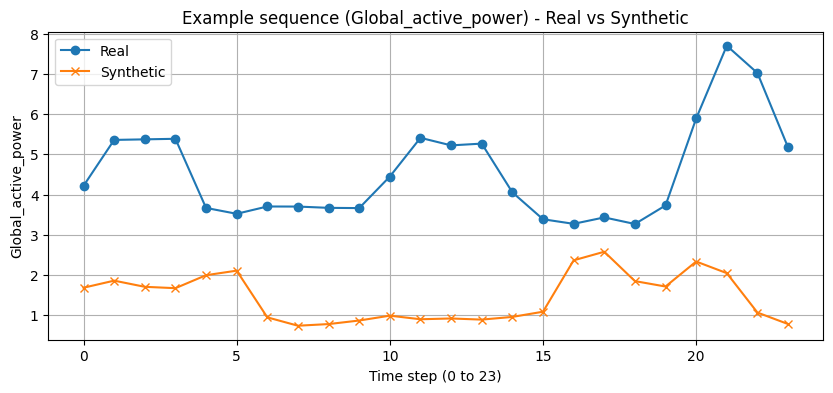

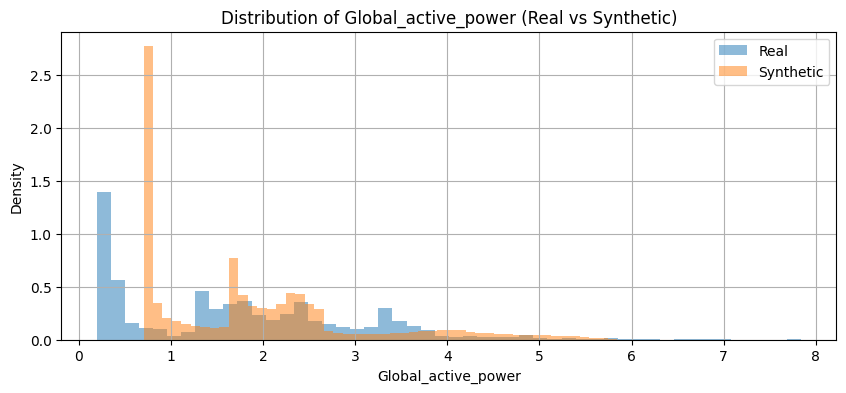

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make plots appear in notebook
%matplotlib inline

# -----------------------------------
# 1) Load real data again (train CSV)
# -----------------------------------
train_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_train_5000.csv"
df = pd.read_csv(train_path)

# Keep original numeric values
data_real = df.drop(columns=["datetime"]).values.astype(float)
col_names = df.drop(columns=["datetime"]).columns.tolist()

print("Real raw data shape:", data_real.shape)
print("Columns:", col_names)

# -----------------------------------
# 2) Rebuild real sequences in ORIGINAL units
# -----------------------------------
seq_len = 24
real_sequences = []
for i in range(len(data_real) - seq_len):
    real_sequences.append(data_real[i:i+seq_len])
real_sequences = np.array(real_sequences)

print("Real_sequences shape:", real_sequences.shape)

# -----------------------------------
# 3) Load synthetic sequences (already unscaled)
# -----------------------------------
syn_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/synthetic_household.npy"
synthetic_sequences = np.load(syn_path)

print("Synthetic_sequences shape:", synthetic_sequences.shape)

# Make sure shapes match
min_n = min(real_sequences.shape[0], synthetic_sequences.shape[0])
real_sequences = real_sequences[:min_n]
synthetic_sequences = synthetic_sequences[:min_n]

print("Aligned shapes:", real_sequences.shape, synthetic_sequences.shape)

# -----------------------------------
# 4) Plot ONE example sequence overlay (Global_active_power)
# -----------------------------------
var_idx = col_names.index("Global_active_power")  # choose variable
seq_idx = 0  # you can change this later to see other sequences

real_seq = real_sequences[seq_idx, :, var_idx]
syn_seq = synthetic_sequences[seq_idx, :, var_idx]

plt.figure(figsize=(10, 4))
plt.plot(real_seq, label="Real", marker="o")
plt.plot(syn_seq, label="Synthetic", marker="x")
plt.title("Example sequence (Global_active_power) - Real vs Synthetic")
plt.xlabel("Time step (0 to 23)")
plt.ylabel("Global_active_power")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------
# 5) Histogram + KDE for Global_active_power
# -----------------------------------
real_values = real_sequences[:, :, var_idx].flatten()
syn_values = synthetic_sequences[:, :, var_idx].flatten()

plt.figure(figsize=(10, 4))
plt.hist(real_values, bins=50, density=True, alpha=0.5, label="Real")
plt.hist(syn_values, bins=50, density=True, alpha=0.5, label="Synthetic")
plt.title("Distribution of Global_active_power (Real vs Synthetic)")
plt.xlabel("Global_active_power")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

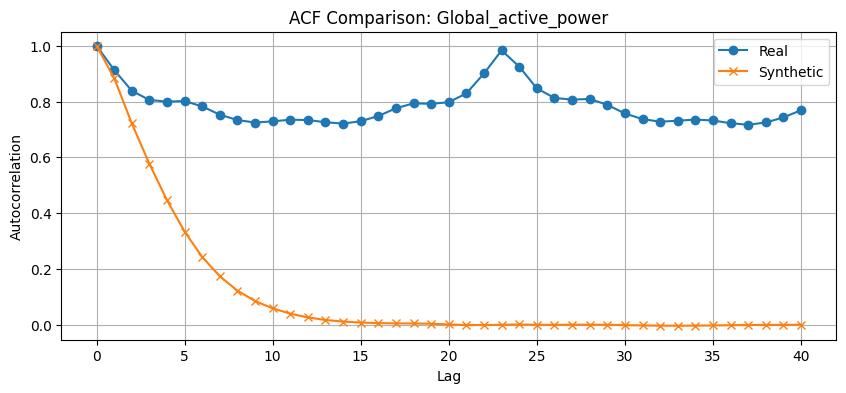

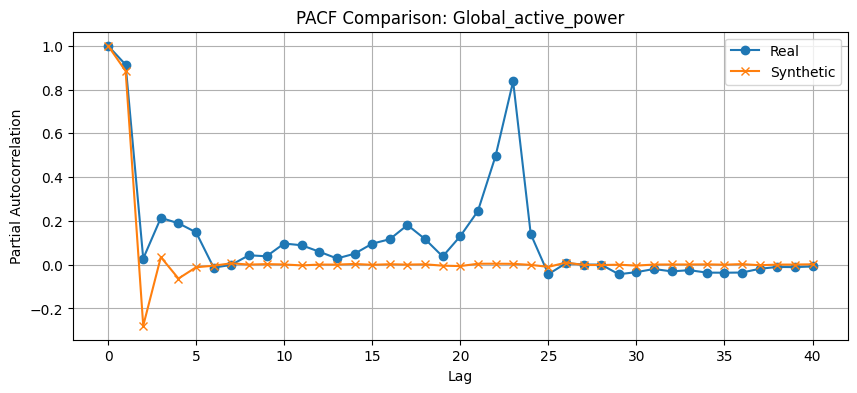

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# We already have:
# - real_sequences
# - synthetic_sequences
# - col_names

var_idx = col_names.index("Global_active_power")

# Flatten all sequences into one big vector (common practice for ACF)
real_flat = real_sequences[:, :, var_idx].flatten()
synthetic_flat = synthetic_sequences[:, :, var_idx].flatten()

# Compute ACF & PACF
lags = 40  # number of lags to inspect

acf_real = acf(real_flat, nlags=lags)
acf_syn = acf(synthetic_flat, nlags=lags)

pacf_real = pacf(real_flat, nlags=lags, method='yw')
pacf_syn = pacf(synthetic_flat, nlags=lags, method='yw')

# ---------- Plot ACF ----------
plt.figure(figsize=(10,4))
plt.plot(acf_real, label="Real", marker='o')
plt.plot(acf_syn, label="Synthetic", marker='x')
plt.title("ACF Comparison: Global_active_power")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid(True)
plt.show()

# ---------- Plot PACF ----------
plt.figure(figsize=(10,4))
plt.plot(pacf_real, label="Real", marker='o')
plt.plot(pacf_syn, label="Synthetic", marker='x')
plt.title("PACF Comparison: Global_active_power")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.legend()
plt.grid(True)
plt.show()

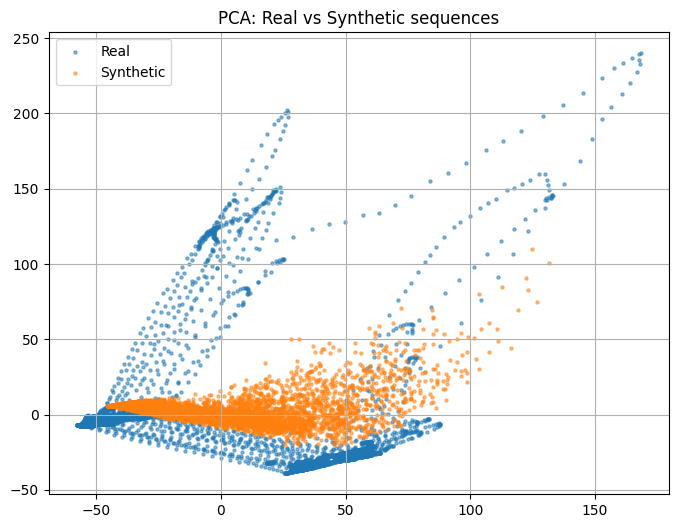

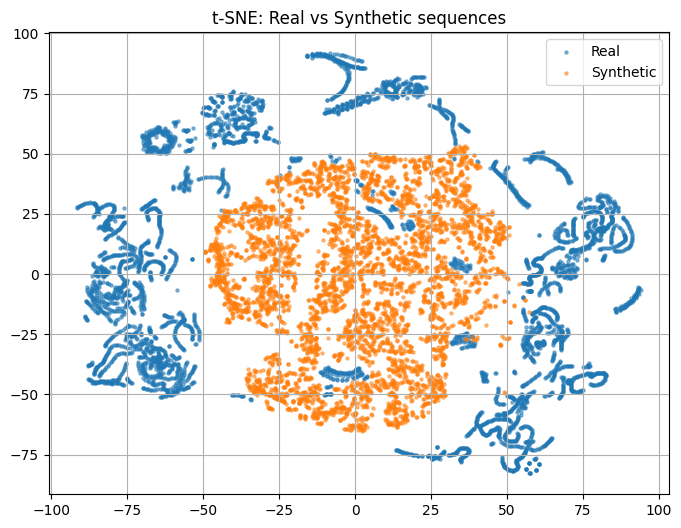

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Flatten: (N, 24, 7) -> (N, 168)
real_flatten = real_sequences.reshape(real_sequences.shape[0], -1)
syn_flatten  = synthetic_sequences.reshape(synthetic_sequences.shape[0], -1)

# Keep same number of samples for fair comparison
n = min(len(real_flatten), len(syn_flatten))
real_flatten = real_flatten[:n]
syn_flatten  = syn_flatten[:n]

# -----------------------------------
# 1) PCA (2D)
# -----------------------------------
pca = PCA(n_components=2)
combined = np.vstack([real_flatten, syn_flatten])
pca_result = pca.fit_transform(combined)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:n,0], pca_result[:n,1], s=5, alpha=0.5, label="Real")
plt.scatter(pca_result[n:,0], pca_result[n:,1], s=5, alpha=0.5, label="Synthetic")
plt.title("PCA: Real vs Synthetic sequences")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------
# 2) t-SNE (2D)
# -----------------------------------
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca')
tsne_result = tsne.fit_transform(combined)

plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:n,0], tsne_result[:n,1], s=5, alpha=0.5, label="Real")
plt.scatter(tsne_result[n:,0], tsne_result[n:,1], s=5, alpha=0.5, label="Synthetic")
plt.title("t-SNE: Real vs Synthetic sequences")
plt.legend()
plt.grid(True)
plt.show()

Real series length: 5000
Synthetic series length: 5000


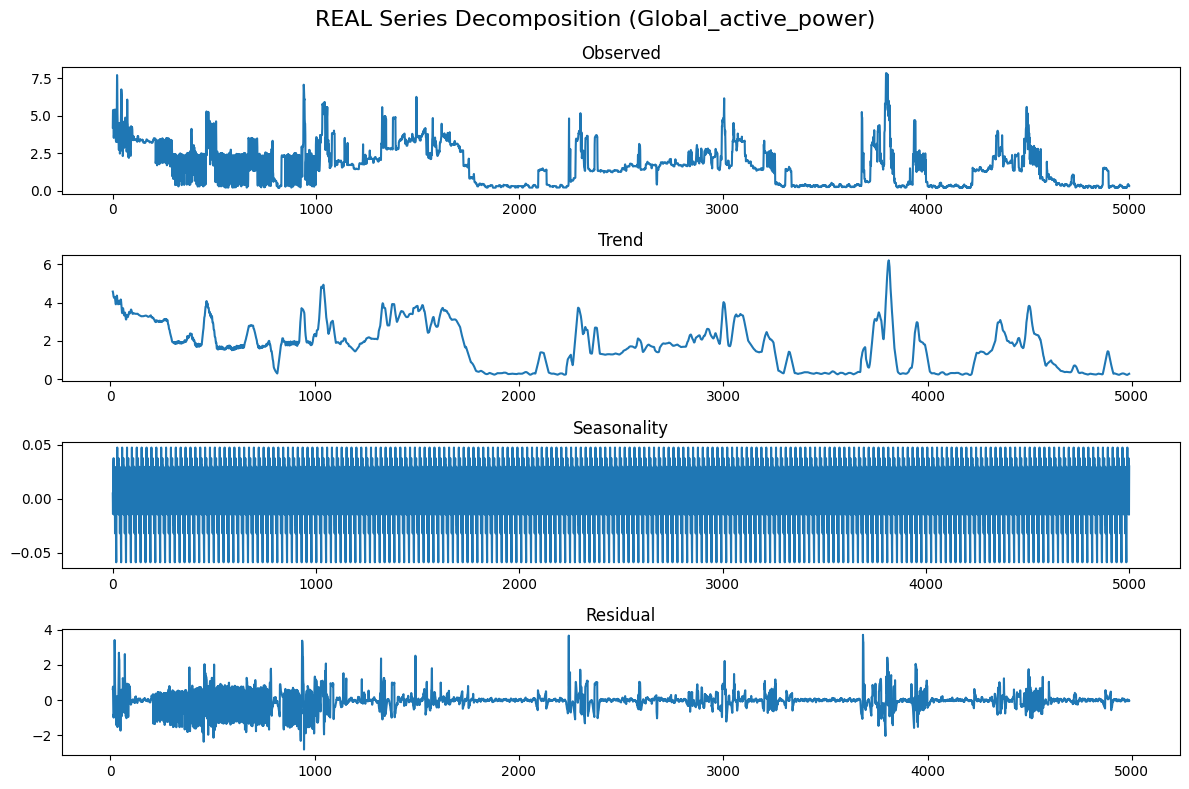

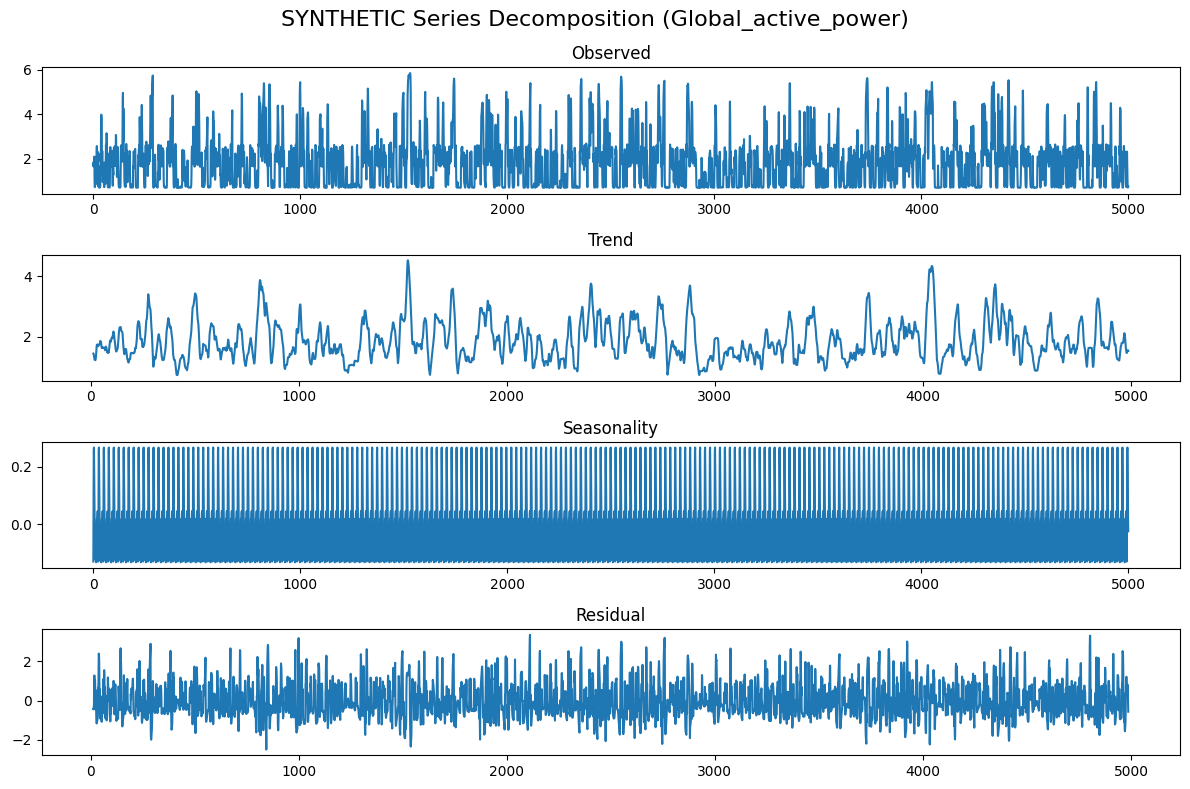

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# =============================
# 1) Build real 1-D time series
# =============================
real_series = df["Global_active_power"].astype(float).values[:5000]

# =============================
# 2) Build synthetic 1-D time series
#    (flatten the first 5000 points)
# =============================
syn_series = synthetic_sequences[:, :, col_names.index("Global_active_power")].flatten()
syn_series = syn_series[:5000]

print("Real series length:", len(real_series))
print("Synthetic series length:", len(syn_series))

# =============================
# 3) Decompose (trend + seasonal + residual)
# =============================
result_real = seasonal_decompose(real_series, period=24, model='additive')
result_syn  = seasonal_decompose(syn_series, period=24, model='additive')

# =============================
# 4) Plot REAL decomposition
# =============================
plt.figure(figsize=(12,8))
plt.suptitle("REAL Series Decomposition (Global_active_power)", fontsize=16)

plt.subplot(4,1,1)
plt.plot(real_series)
plt.title("Observed")

plt.subplot(4,1,2)
plt.plot(result_real.trend)
plt.title("Trend")

plt.subplot(4,1,3)
plt.plot(result_real.seasonal)
plt.title("Seasonality")

plt.subplot(4,1,4)
plt.plot(result_real.resid)
plt.title("Residual")

plt.tight_layout()
plt.show()

# =============================
# 5) Plot SYNTHETIC decomposition
# =============================
plt.figure(figsize=(12,8))
plt.suptitle("SYNTHETIC Series Decomposition (Global_active_power)", fontsize=16)

plt.subplot(4,1,1)
plt.plot(syn_series)
plt.title("Observed")

plt.subplot(4,1,2)
plt.plot(result_syn.trend)
plt.title("Trend")

plt.subplot(4,1,3)
plt.plot(result_syn.seasonal)
plt.title("Seasonality")

plt.subplot(4,1,4)
plt.plot(result_syn.resid)
plt.title("Residual")

plt.tight_layout()
plt.show()

In [17]:
!pip install ruptures --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00


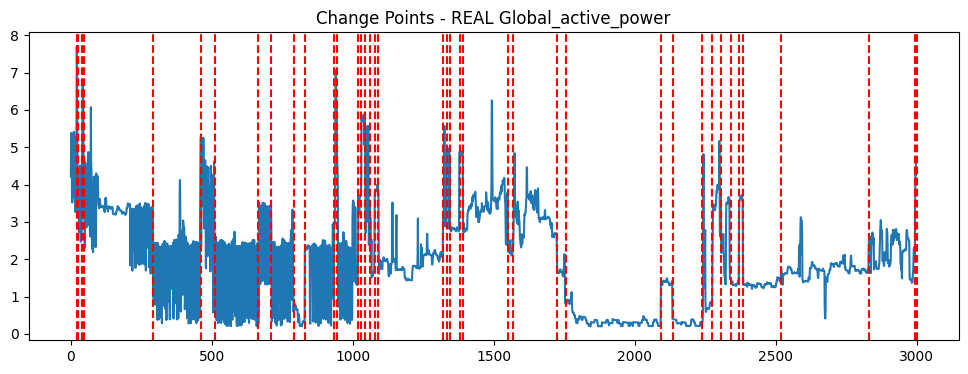

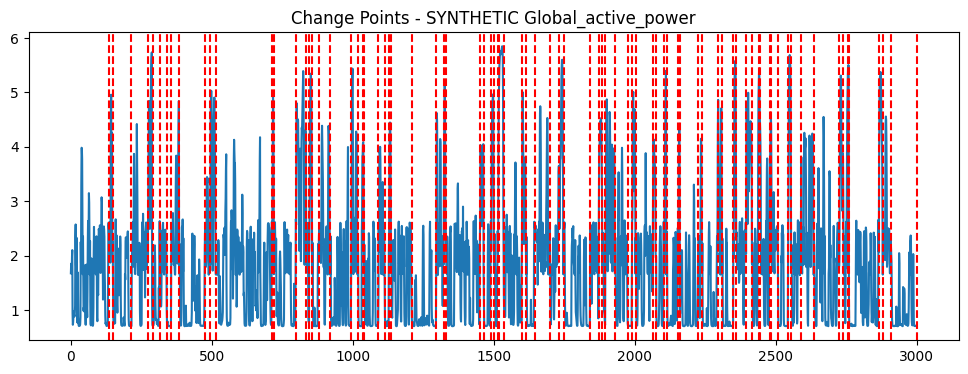

Real change-points: [20, 25, 40, 45, 290, 460, 510, 665, 710, 790, 830, 935, 945, 1020, 1030, 1045, 1060, 1080, 1090, 1320, 1335, 1345, 1380, 1390, 1550, 1570, 1725, 1755, 2095, 2135, 2240, 2275, 2305, 2340, 2370, 2385, 2520, 2830, 2995, 3000]
Synthetic change-points: [135, 150, 215, 275, 290, 315, 340, 355, 385, 475, 495, 515, 715, 720, 800, 835, 845, 855, 880, 920, 995, 1020, 1035, 1040, 1090, 1115, 1130, 1135, 1210, 1295, 1325, 1330, 1450, 1465, 1490, 1500, 1515, 1520, 1535, 1600, 1615, 1645, 1700, 1730, 1750, 1840, 1875, 1885, 1895, 1930, 1975, 1990, 2005, 2065, 2075, 2105, 2115, 2155, 2160, 2225, 2240, 2295, 2310, 2350, 2360, 2395, 2415, 2440, 2445, 2480, 2485, 2510, 2545, 2555, 2590, 2635, 2725, 2740, 2755, 2760, 2865, 2880, 2910, 3000]


In [18]:
import ruptures as rpt
import matplotlib.pyplot as plt

# Use first 3000 points for clarity
real_cp_series = real_series[:3000]
syn_cp_series  = syn_series[:3000]

model = "l2"
algo = rpt.Pelt(model=model).fit(real_cp_series)
real_bkps = algo.predict(pen=10)

algo = rpt.Pelt(model=model).fit(syn_cp_series)
syn_bkps = algo.predict(pen=10)

# ------------------ Plot Real ------------------
plt.figure(figsize=(12,4))
plt.plot(real_cp_series)
for cp in real_bkps:
    plt.axvline(cp, color='red', linestyle='--')
plt.title("Change Points - REAL Global_active_power")
plt.show()

# ------------------ Plot Synthetic ------------------
plt.figure(figsize=(12,4))
plt.plot(syn_cp_series)
for cp in syn_bkps:
    plt.axvline(cp, color='red', linestyle='--')
plt.title("Change Points - SYNTHETIC Global_active_power")
plt.show()

print("Real change-points:", real_bkps)
print("Synthetic change-points:", syn_bkps)


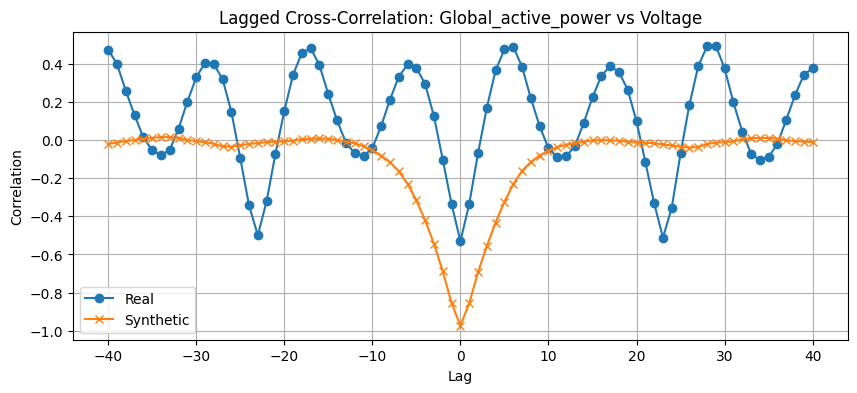

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# choose two variables
var1 = "Global_active_power"
var2 = "Voltage"

i = col_names.index(var1)
j = col_names.index(var2)

# Get flattened series
real_v1 = real_sequences[:,:,i].flatten()[:3000]
real_v2 = real_sequences[:,:,j].flatten()[:3000]

syn_v1  = synthetic_sequences[:,:,i].flatten()[:3000]
syn_v2  = synthetic_sequences[:,:,j].flatten()[:3000]

# function for lagged correlation
def lag_corr(x, y, max_lag=40):
    lags = range(-max_lag, max_lag+1)
    corr = []
    for lag in lags:
        if lag < 0:
            corr.append(np.corrcoef(x[:lag], y[-lag:])[0,1])
        elif lag > 0:
            corr.append(np.corrcoef(x[lag:], y[:-lag])[0,1])
        else:
            corr.append(np.corrcoef(x, y)[0,1])
    return lags, corr

lags_real, corr_real = lag_corr(real_v1, real_v2)
lags_syn,  corr_syn  = lag_corr(syn_v1, syn_v2)

# Plot
plt.figure(figsize=(10,4))
plt.plot(lags_real, corr_real, label="Real", marker="o")
plt.plot(lags_syn, corr_syn, label="Synthetic", marker="x")
plt.title("Lagged Cross-Correlation: Global_active_power vs Voltage")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()
plt.show()

In [20]:
!pip install fastdtw --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [23]:
import numpy as np

def dtw_distance(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    n, m = len(a), len(b)
    dp = np.full((n + 1, m + 1), np.inf)
    dp[0, 0] = 0.0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(a[i - 1] - b[j - 1])
            dp[i, j] = cost + min(
                dp[i - 1, j],     # insertion
                dp[i, j - 1],     # deletion
                dp[i - 1, j - 1]  # match
            )
    return dp[n, m]

dtw_distances = []

for k in range(100):   # first 100 sequences
    r = real_sequences[k, :, var_idx]
    s = synthetic_sequences[k, :, var_idx]
    dist = dtw_distance(r, s)
    dtw_distances.append(dist)

dtw_mean = float(np.mean(dtw_distances))
dtw_std  = float(np.std(dtw_distances))

print("DTW Mean Distance:", dtw_mean)
print("DTW Std:", dtw_std)


DTW Mean Distance: 46.022217452966764
DTW Std: 15.547264733848033


In [24]:
import numpy as np

# -----------------------------
# 1) Pull the variable to test
# -----------------------------
real_flat = real_sequences[:, :, var_idx].flatten()
syn_flat  = synthetic_sequences[:, :, var_idx].flatten()

# Subsample to avoid huge memory
real_sample = real_flat[:5000]
syn_sample  = syn_flat[:5000]

# -----------------------------
# 2) Gaussian kernel
# -----------------------------
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(- (x - y)**2 / (2 * sigma**2))

# -----------------------------
# 3) MMD calculation
# -----------------------------
def compute_mmd(x, y, sigma=1.0):
    xx = np.mean([gaussian_kernel(a, b, sigma) for a in x for b in x])
    yy = np.mean([gaussian_kernel(a, b, sigma) for a in y for b in y])
    xy = np.mean([gaussian_kernel(a, b, sigma) for a in x for b in y])
    return xx + yy - 2 * xy

mmd_value = compute_mmd(real_sample, syn_sample, sigma=1.0)
print("MMD (sigma=1.0):", mmd_value)

MMD (sigma=1.0): 0.6654222352169852


In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import ruptures as rpt

%matplotlib inline

# ---------------------------
# 0) Create figures folder
# ---------------------------
fig_dir = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/figures"
os.makedirs(fig_dir, exist_ok=True)
print("Saving figures to:", fig_dir)

# ---------------------------
# 1) Reload real & synthetic
# ---------------------------
train_path = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/household_train_5000.csv"
syn_path   = "/content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/raw_data/synthetic_household.npy"

df = pd.read_csv(train_path)
data_real = df.drop(columns=["datetime"]).values.astype(float)
col_names = df.drop(columns=["datetime"]).columns.tolist()
synthetic_sequences = np.load(syn_path)

seq_len = 24
real_sequences = []
for i in range(len(data_real) - seq_len):
    real_sequences.append(data_real[i:i+seq_len])
real_sequences = np.array(real_sequences)

min_n = min(real_sequences.shape[0], synthetic_sequences.shape[0])
real_sequences = real_sequences[:min_n]
synthetic_sequences = synthetic_sequences[:min_n]

var_idx = col_names.index("Global_active_power")

# ---------------------------
# 2) Overlay + Histogram
# ---------------------------
seq_idx = 0
real_seq = real_sequences[seq_idx, :, var_idx]
syn_seq  = synthetic_sequences[seq_idx, :, var_idx]

plt.figure(figsize=(10,4))
plt.plot(real_seq, label="Real", marker="o")
plt.plot(syn_seq, label="Synthetic", marker="x")
plt.title("Example sequence (Global_active_power) - Real vs Synthetic")
plt.xlabel("Time step")
plt.ylabel("Global_active_power")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(fig_dir, "overlay_global_active_power_seq0.png"))
plt.close()

real_values = real_sequences[:, :, var_idx].flatten()
syn_values  = synthetic_sequences[:, :, var_idx].flatten()

plt.figure(figsize=(10,4))
plt.hist(real_values, bins=50, density=True, alpha=0.5, label="Real")
plt.hist(syn_values,  bins=50, density=True, alpha=0.5, label="Synthetic")
plt.title("Distribution of Global_active_power (Real vs Synthetic)")
plt.xlabel("Global_active_power")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(fig_dir, "hist_global_active_power_real_vs_synth.png"))
plt.close()

# ---------------------------
# 3) ACF / PACF
# ---------------------------
lags = 40
real_flat = real_values
synthetic_flat = syn_values

acf_real = acf(real_flat, nlags=lags)
acf_syn  = acf(synthetic_flat, nlags=lags)
pacf_real = pacf(real_flat, nlags=lags, method='yw')
pacf_syn  = pacf(synthetic_flat, nlags=lags, method='yw')

plt.figure(figsize=(10,4))
plt.plot(acf_real, label="Real", marker='o')
plt.plot(acf_syn,  label="Synthetic", marker='x')
plt.title("ACF Comparison: Global_active_power")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(fig_dir, "acf_global_active_power.png"))
plt.close()

plt.figure(figsize=(10,4))
plt.plot(pacf_real, label="Real", marker='o')
plt.plot(pacf_syn,  label="Synthetic", marker='x')
plt.title("PACF Comparison: Global_active_power")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(fig_dir, "pacf_global_active_power.png"))
plt.close()

# ---------------------------
# 4) PCA + t-SNE
# ---------------------------
real_flatten = real_sequences.reshape(real_sequences.shape[0], -1)
syn_flatten  = synthetic_sequences.reshape(synthetic_sequences.shape[0], -1)
n = min(len(real_flatten), len(syn_flatten))
real_flatten = real_flatten[:n]
syn_flatten  = syn_flatten[:n]
combined = np.vstack([real_flatten, syn_flatten])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:n,0], pca_result[:n,1], s=5, alpha=0.5, label="Real")
plt.scatter(pca_result[n:,0], pca_result[n:,1], s=5, alpha=0.5, label="Synthetic")
plt.title("PCA: Real vs Synthetic sequences")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(fig_dir, "pca_real_vs_synthetic.png"))
plt.close()

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca')
tsne_result = tsne.fit_transform(combined)

plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:n,0], tsne_result[:n,1], s=5, alpha=0.5, label="Real")
plt.scatter(tsne_result[n:,0], tsne_result[n:,1], s=5, alpha=0.5, label="Synthetic")
plt.title("t-SNE: Real vs Synthetic sequences")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(fig_dir, "tsne_real_vs_synthetic.png"))
plt.close()

# ---------------------------
# 5) Seasonality/Trend Decomposition
# ---------------------------
real_series = df["Global_active_power"].astype(float).values[:5000]
syn_series  = synthetic_sequences[:, :, var_idx].flatten()[:5000]

res_real = seasonal_decompose(real_series, period=24, model='additive')
res_syn  = seasonal_decompose(syn_series,  period=24, model='additive')

plt.figure(figsize=(12,8))
plt.suptitle("REAL Decomposition (Global_active_power)", fontsize=16)
plt.subplot(4,1,1); plt.plot(real_series);           plt.title("Observed")
plt.subplot(4,1,2); plt.plot(res_real.trend);        plt.title("Trend")
plt.subplot(4,1,3); plt.plot(res_real.seasonal);     plt.title("Seasonality")
plt.subplot(4,1,4); plt.plot(res_real.resid);        plt.title("Residual")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "decomposition_real_global_active_power.png"))
plt.close()

plt.figure(figsize=(12,8))
plt.suptitle("SYNTHETIC Decomposition (Global_active_power)", fontsize=16)
plt.subplot(4,1,1); plt.plot(syn_series);           plt.title("Observed")
plt.subplot(4,1,2); plt.plot(res_syn.trend);        plt.title("Trend")
plt.subplot(4,1,3); plt.plot(res_syn.seasonal);     plt.title("Seasonality")
plt.subplot(4,1,4); plt.plot(res_syn.resid);        plt.title("Residual")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "decomposition_synthetic_global_active_power.png"))
plt.close()

# ---------------------------
# 6) Change-point detection
# ---------------------------
real_cp_series = real_series[:3000]
syn_cp_series  = syn_series[:3000]

algo = rpt.Pelt(model="l2").fit(real_cp_series)
real_bkps = algo.predict(pen=10)

algo = rpt.Pelt(model="l2").fit(syn_cp_series)
syn_bkps = algo.predict(pen=10)

plt.figure(figsize=(12,4))
plt.plot(real_cp_series)
for cp in real_bkps:
    plt.axvline(cp, color='red', linestyle='--')
plt.title("Change Points - REAL Global_active_power")
plt.savefig(os.path.join(fig_dir, "changepoints_real_global_active_power.png"))
plt.close()

plt.figure(figsize=(12,4))
plt.plot(syn_cp_series)
for cp in syn_bkps:
    plt.axvline(cp, color='red', linestyle='--')
plt.title("Change Points - SYNTHETIC Global_active_power")
plt.savefig(os.path.join(fig_dir, "changepoints_synthetic_global_active_power.png"))
plt.close()

# ---------------------------
# 7) Lagged cross-correlation
# ---------------------------
var1 = "Global_active_power"
var2 = "Voltage"
i = col_names.index(var1)
j = col_names.index(var2)

real_v1 = real_sequences[:,:,i].flatten()[:3000]
real_v2 = real_sequences[:,:,j].flatten()[:3000]
syn_v1  = synthetic_sequences[:,:,i].flatten()[:3000]
syn_v2  = synthetic_sequences[:,:,j].flatten()[:3000]

def lag_corr(x, y, max_lag=40):
    lags = range(-max_lag, max_lag+1)
    corr = []
    for lag in lags:
        if lag < 0:
            corr.append(np.corrcoef(x[:lag], y[-lag:])[0,1])
        elif lag > 0:
            corr.append(np.corrcoef(x[lag:], y[:-lag])[0,1])
        else:
            corr.append(np.corrcoef(x, y)[0,1])
    return list(lags), corr

lags_real, corr_real = lag_corr(real_v1, real_v2)
lags_syn,  corr_syn  = lag_corr(syn_v1, syn_v2)

plt.figure(figsize=(10,4))
plt.plot(lags_real, corr_real, label="Real", marker="o")
plt.plot(lags_syn,  corr_syn,  label="Synthetic", marker="x")
plt.title("Lagged Cross-Correlation: Global_active_power vs Voltage")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(fig_dir, "lagged_xcorr_global_active_power_voltage.png"))
plt.close()

print("All key figures saved in:", fig_dir)

Saving figures to: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/figures
All key figures saved in: /content/drive/MyDrive/FINAL_BDA_PROJECT_CEP/figures


In [26]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error

# -------------------------------
# Prepare real/synthetic data
# -------------------------------
var_idx = col_names.index("Global_active_power")

real_flat = real_sequences[:, :, var_idx]
syn_flat  = synthetic_sequences[:, :, var_idx]

# We need pairs: X = first 24 points, y = next point
def build_xy(data):
    X = data[:, :-1]   # shape: (N, 23)
    y = data[:, -1]    # shape: (N,)
    return X, y

# Make 24->next-point prediction
X_real, y_real = build_xy(real_flat)
X_syn,  y_syn  = build_xy(syn_flat)

# Convert to torch tensors
def to_tensor(x, y):
    x = torch.tensor(x, dtype=torch.float32).unsqueeze(-1)  # (N, 23, 1)
    y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # (N, 1)
    return x, y

Xr, Yr = to_tensor(X_real, y_real)
Xs, Ys = to_tensor(X_syn,  y_syn)

# -------------------------------
# Define tiny LSTM model
# -------------------------------
class SmallLSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=8, num_layers=1, batch_first=True)
        self.fc = nn.Linear(8, 1)
    def forward(self, x):
        out,_ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out)

# Training function
def train_model(X_train, y_train, epochs=5):
    model = SmallLSTM()
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    for ep in range(epochs):
        optimizer.zero_grad()
        pred = model(X_train)
        loss = criterion(pred, y_train)
        loss.backward()
        optimizer.step()
    return model

# -------------------------------
# 1) Train on Synthetic -> Test on Real
# -------------------------------
model_syn = train_model(Xs, Ys, epochs=5)
with torch.no_grad():
    pred_real = model_syn(Xr)
mse_syn_to_real = mean_squared_error(Yr.numpy(), pred_real.numpy())

# -------------------------------
# 2) Train on Real -> Test on Synthetic
# -------------------------------
model_real = train_model(Xr, Yr, epochs=5)
with torch.no_grad():
    pred_syn = model_real(Xs)
mse_real_to_syn = mean_squared_error(Ys.numpy(), pred_syn.numpy())

print("Predictive Score (Train Synthetic → Test Real):", mse_syn_to_real)
print("Predictive Score (Train Real → Test Synthetic):", mse_real_to_syn)

Predictive Score (Train Synthetic → Test Real): 3.747241735458374
Predictive Score (Train Real → Test Synthetic): 4.260073184967041
